In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('c:/data/titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

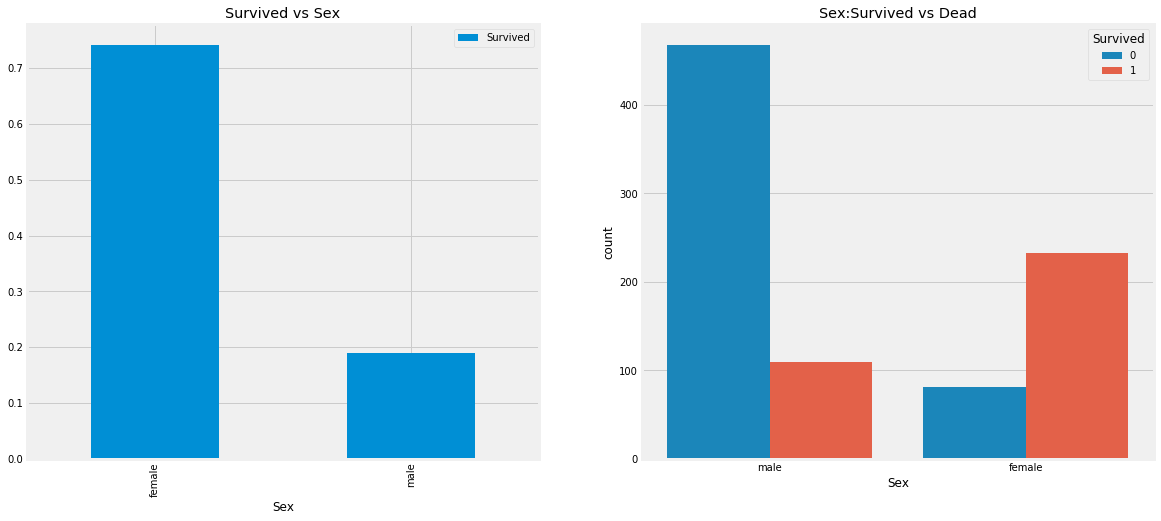

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax= ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


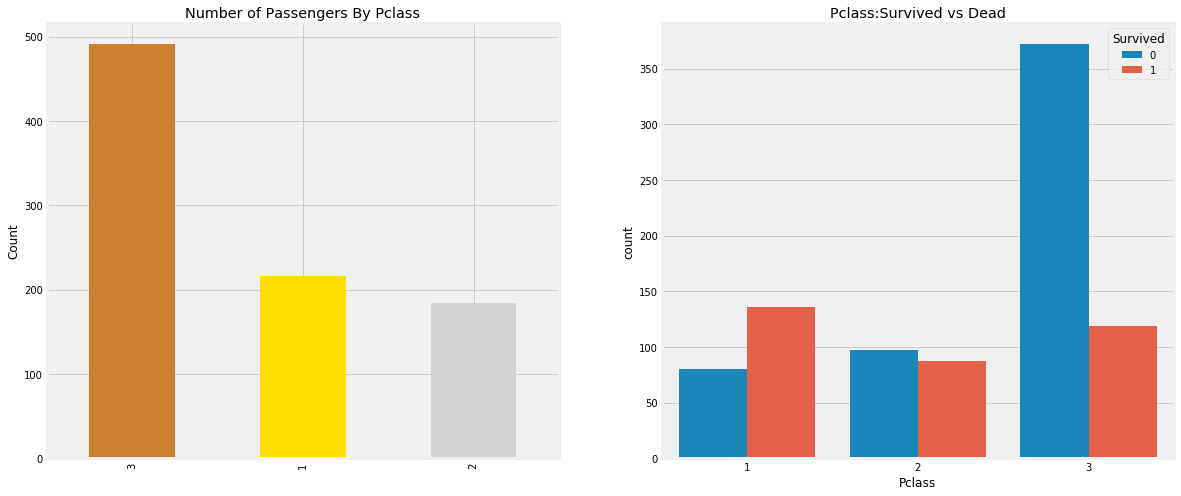

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

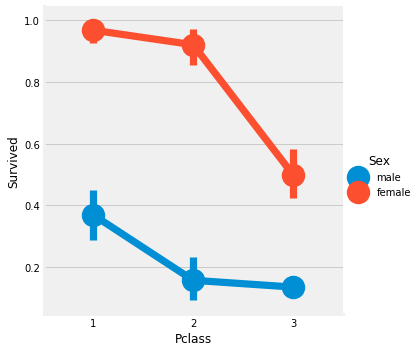

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

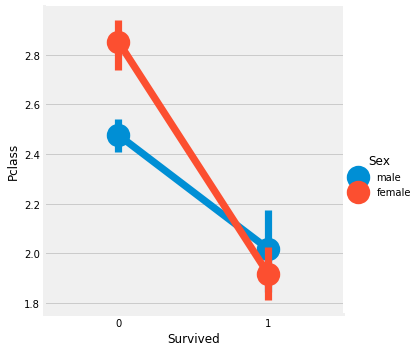

In [12]:
sns.factorplot('Survived','Pclass',hue='Sex',data=data)

In [13]:
print('Oldest Passenger was of:',data.Age.max(),'Years')

Oldest Passenger was of: 80.0 Years


### 

In [14]:
print('Youngest Passenger was of: ',data['Age'].min(),'Years')
print('Average Age on the ship: ', data.Age.mean(),'Years')

Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


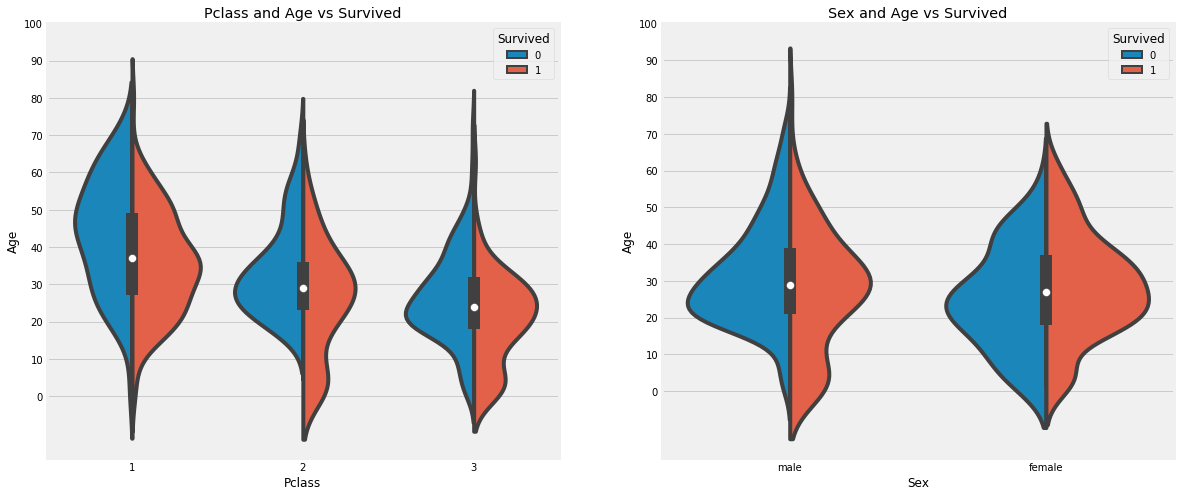

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age', hue = 'Survived', data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue = 'Survived', data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [16]:
data['Initial'] = 0

In [17]:
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(data.Initial,data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33

In [22]:
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Others'),'Age'] = 46
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22

In [23]:
data.Age.isnull().any()

False

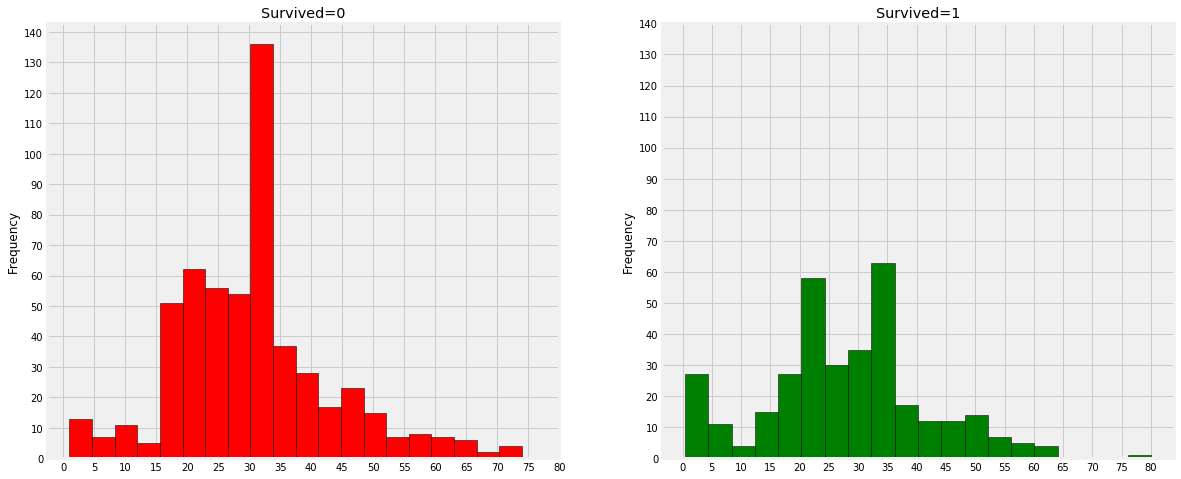

In [24]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x=list(range(0,85,5))
y=list(range(0,150,10))
ax[0].set_xticks(x)
ax[0].set_yticks(y)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green',bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
ax[1].set_xticks(x)
ax[1].set_yticks(y)
plt.show()

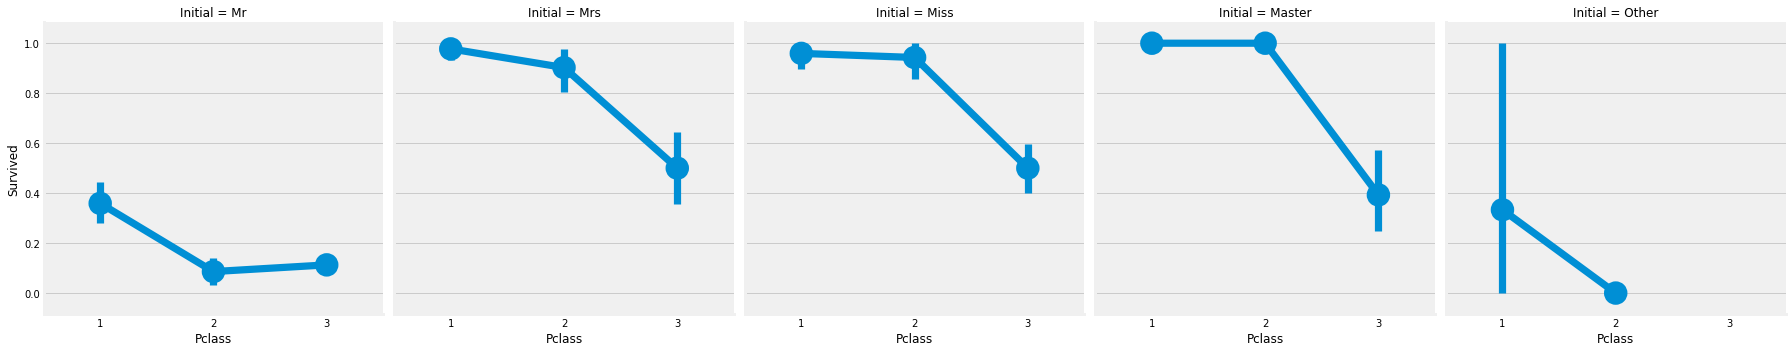

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [26]:
pd.crosstab([data.Pclass,data.Embarked],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Pclass Embarked                           
1      C             1   42   25   17   85
       Q             0    1    1    0    2
       S             2   46   51   28  127
2      C             0    7    8    2   17
       Q             0    2    1    0    3
       S             6   61   82   15  164
3      C             8   15   33   10   66
       Q             9   24   36    3   72
       S            55   33  231   34  353
All                 81  231  468  109  889

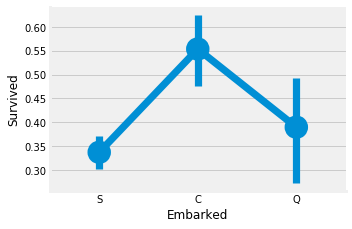

In [27]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
# 현재 figure에 접근해야 할 필요성이 있을 때 plt.gcf()사용.(Get Current Figure)
fig.set_size_inches(5,3)
plt.show()

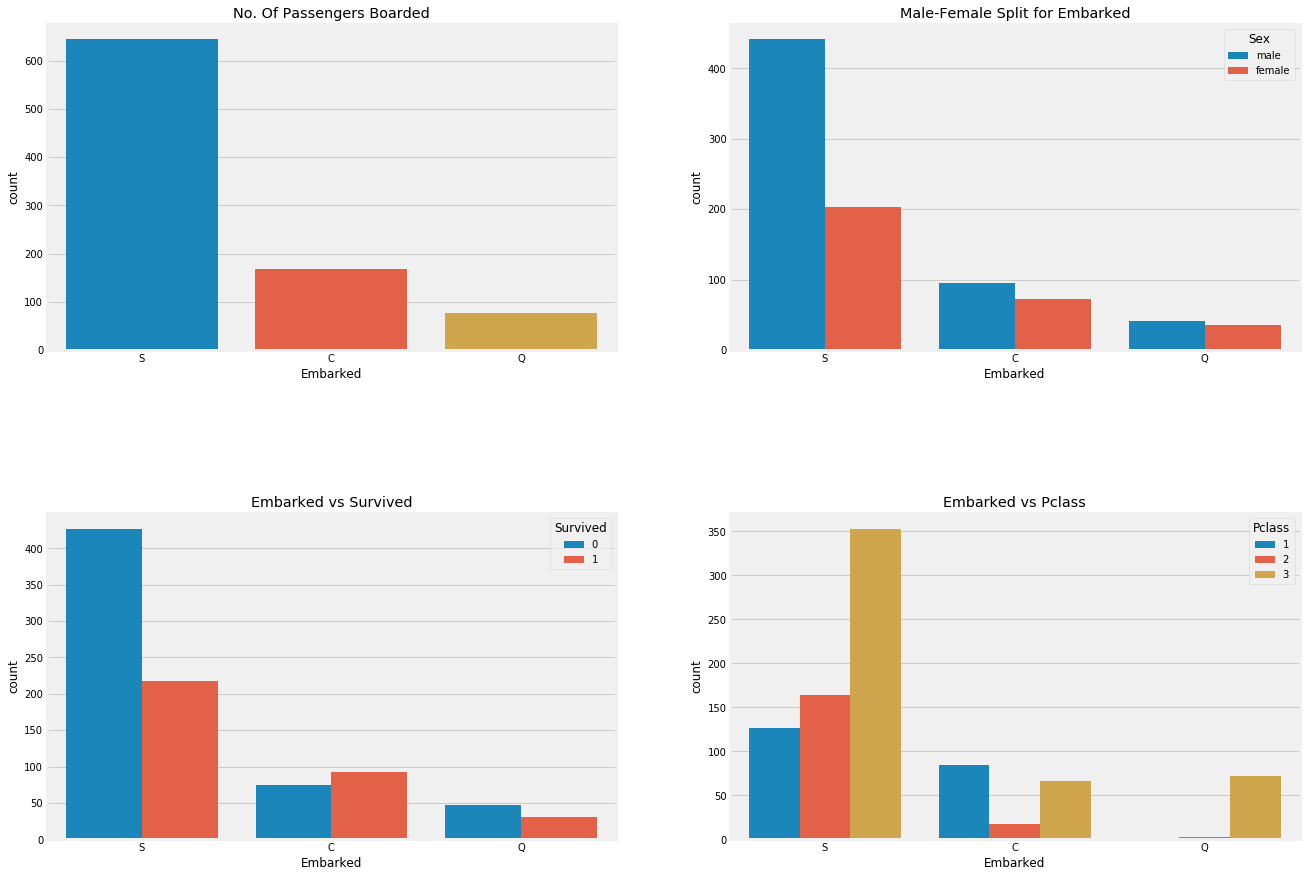

In [28]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex', data = data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax= ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

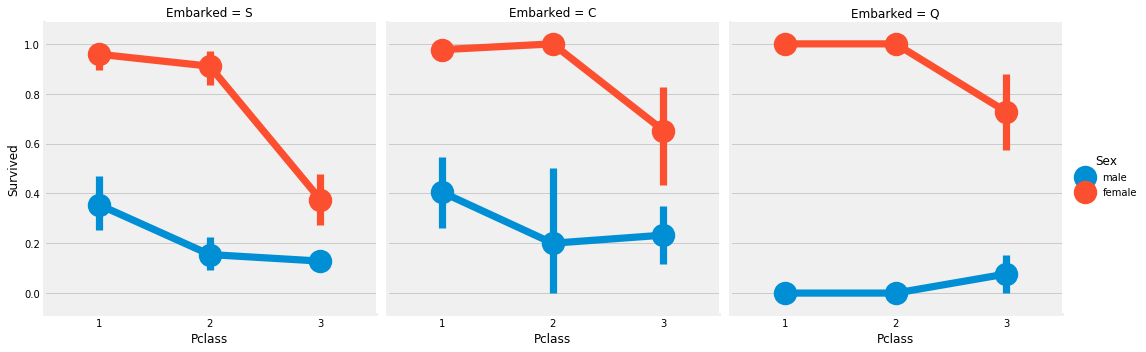

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex', col='Embarked',data=data)
plt.show()

In [30]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

In [31]:
pd.crosstab([data.SibSp],data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


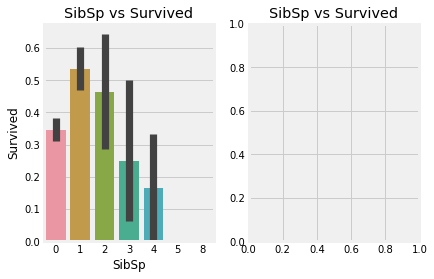

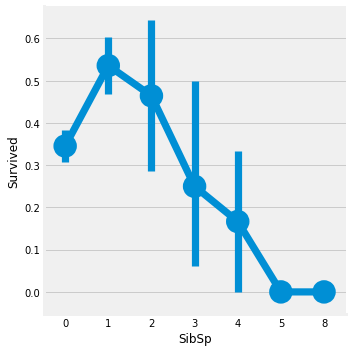

In [32]:
f, ax = plt.subplots(1,2)
sns.barplot('SibSp','Survived',data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

# plt.close(2)
plt.show()

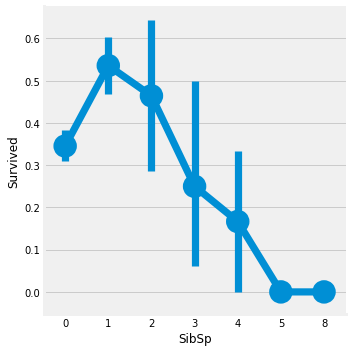

In [33]:
sns.factorplot('SibSp','Survived', data=data)

In [34]:
pd.crosstab(data.SibSp,data.Pclass,margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


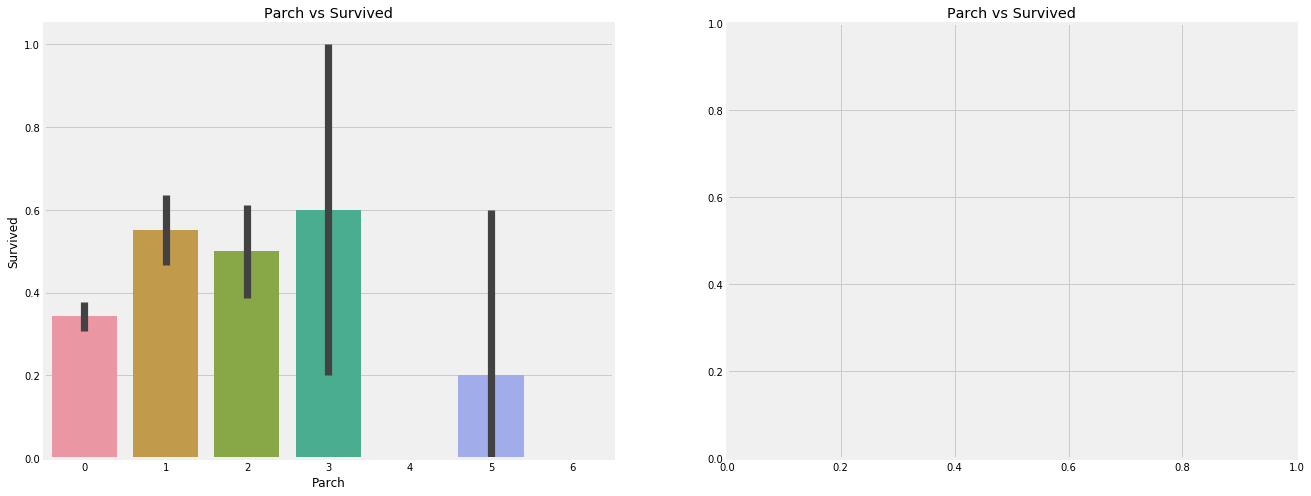

In [35]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived', data= data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [36]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:' , data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


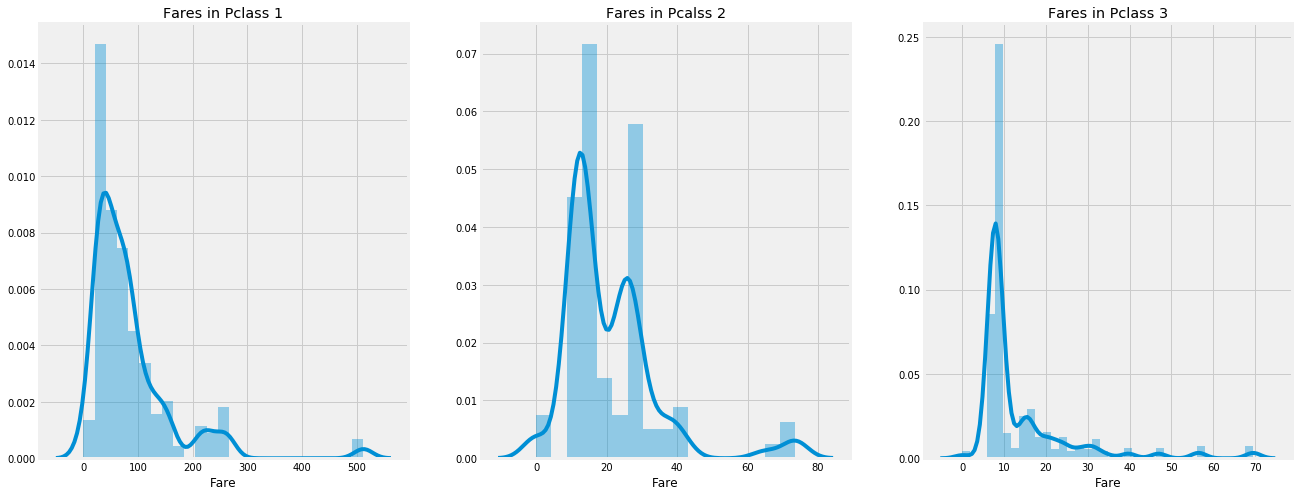

In [37]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pcalss 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

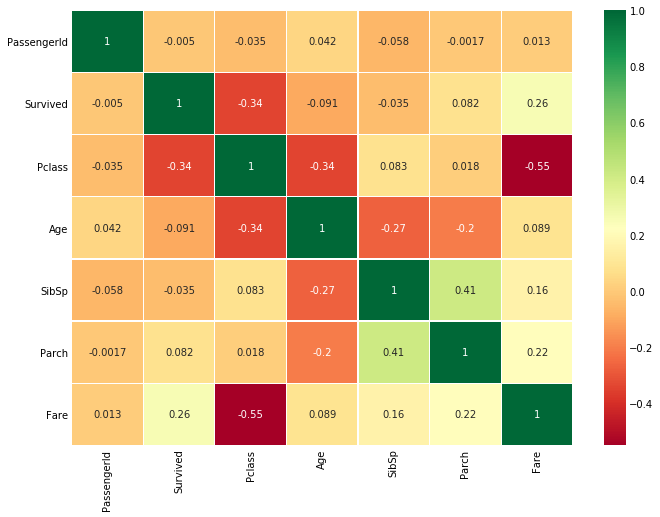

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, linecolor='white')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [39]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [40]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


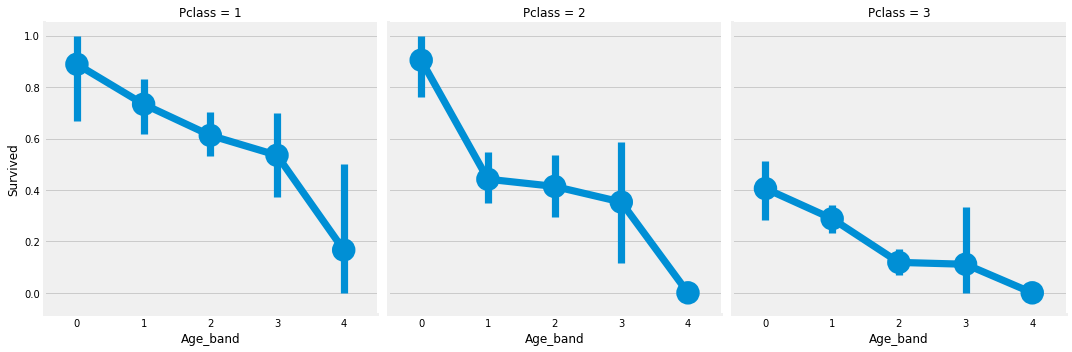

In [41]:
sns.factorplot('Age_band','Survived',col = 'Pclass',data=data)

In [42]:
data['Family_Size'] = 0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

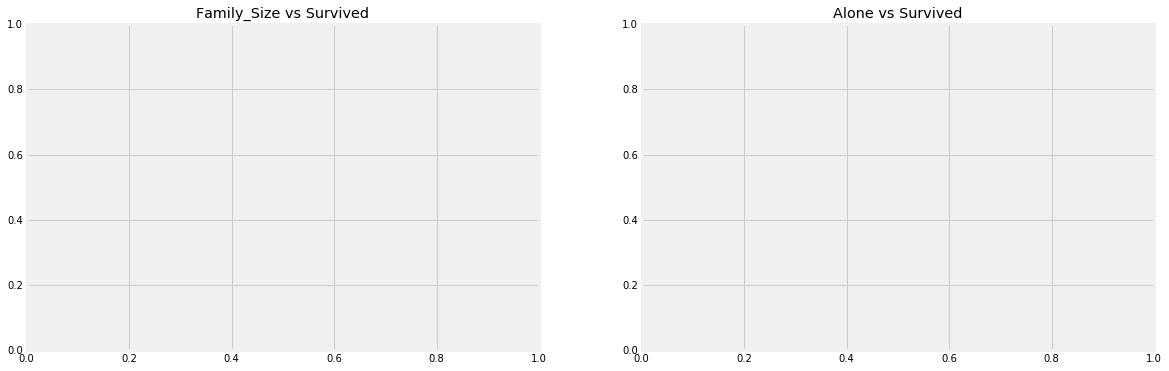

In [43]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived', data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

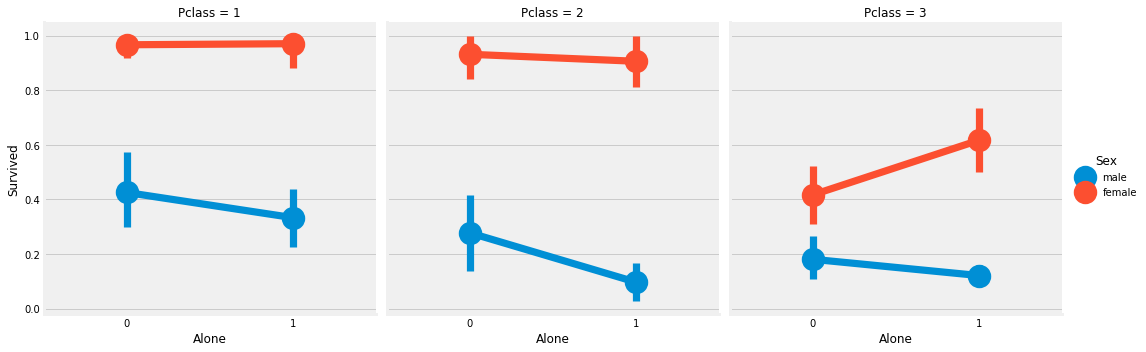

In [44]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [45]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [46]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.0)&(data['Fare']<=513),'Fare_cat']=3

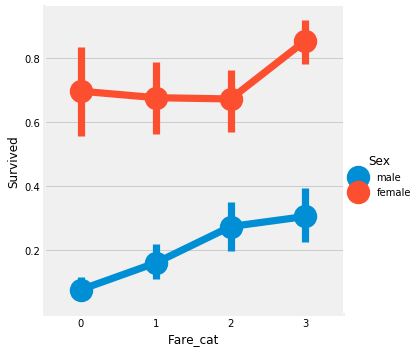

In [47]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=data)

In [48]:
data.Sex.replace(['male','female'],[0,1],inplace=True)

In [49]:
data.Embarked.replace(['S','C','Q'],[0,1,2])
data.Initial.replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

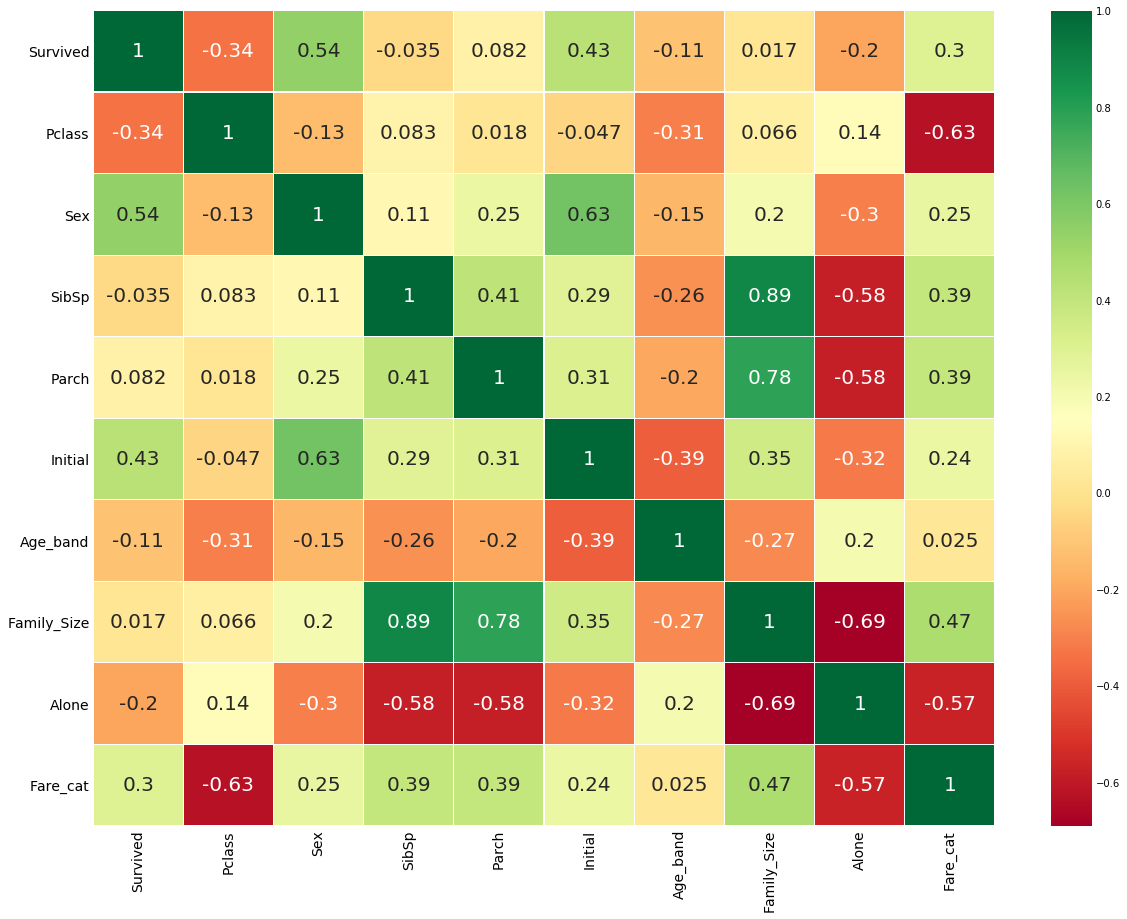

In [50]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

7/20, 데이터 전처리까지 학습.
이후에 파트3 진행.

https://www.kaggle.com/ash316/eda-to-prediction-dietanic

7/22
머신러닝 중단, 자연어 처리 입문 캐글부터 시작하자...

## Predictive Modeling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [59]:
train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify = data['Survived'])

In [63]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

ValueError: could not convert string to float: 'S'